In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

In [37]:
taille = 20

def proba_target(spin):
    if torch.eq(spin, torch.tensor([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])).all().item():
        return 0.469
    elif torch.eq(spin, torch.tensor([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])).all().item():
        return 0.469
    else:
        return 0.001

def log_proba_target(spins):
    log_probas = []
    for spin in spins:
        log_probas.append(log_proba_target_single(spin))
    return torch.tensor(log_probas)

def log_proba_target_single(spin):
    if torch.eq(spin, torch.tensor([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])).all().item():
        return np.log(0.469)
    elif torch.eq(spin, torch.tensor([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])).all().item():
        return np.log(0.469)
    else:
        return np.log(0.001)
    
def log_uniform(spins):
    return torch.tensor([np.log(1/2**taille) for i in range(len(spins))])

def proba_exemple2(spin):
    """
    Renvoie une proba plus élevée si la somme des spins est paire. On prend enfin le log de cette distribution.
    """
    if torch.sum(spin) % 2 == 0:
        return np.log(1/48)
    else:
        return np.log(1/96)
    
def proba_exemple3(spin):
    """
    Renvoie une proba élevée si le premier spin vaut 1 et faible sinon
    """
    if spin[0] == 1:
        return (1/(2**(taille-1)))
    else:
        return (1/(2**(taille+8)))
    
def proba2_vect(spins):
    """
    Version vectorisée de proba_exemple2
    """
    probas = []
    for spin in spins:
        probas.append(proba_exemple2(spin))
    return torch.tensor(probas)

def proba3_vect(spins):
    """
    Version vectorisée de proba_exemple3
    """
    probas = []
    for spin in spins:
        probas.append(proba_exemple3(spin))
    return torch.tensor(probas)



In [53]:
def log_prob_target(spins):
    ''''
    Compute the log probability of the target distribution
    spin confirgurations mostly up more likely (* 0.8) than mostly down (* 0.2)
    '''
    log_probs = torch.ones(spins.shape[0]) * np.log(0.2)
    log_probs[spins.mean(-1) > 0.5] = np.log(0.8)
    return log_probs - np.log(2 ** (taille -1)) 

In [80]:
def log_prob_target_2(spins):
    """
    log proba de la target distribution. High probability if the forst spin is 1 and low otherwise
    """
    log_probs = torch.ones(spins.shape[0]) * np.log(0.01)
    
    log_probs[torch.tensor([spins[i][0] > 0.5 for i in range(len(spins))] )] = np.log(0.8)
    return log_probs - np.log(2 ** (taille -1)) 
    



Epoch 0: 4.106054306030273
Epoch 200: 2.9433188438415527
Epoch 400: 1.9542778730392456
Epoch 600: 1.1637121438980103
Epoch 800: 0.8121601939201355
Epoch 1000: 0.22529011964797974
Epoch 1200: -0.12653210759162903
Epoch 1400: -0.3466890752315521
Epoch 1600: -0.505873441696167
Epoch 1800: -0.5915631651878357


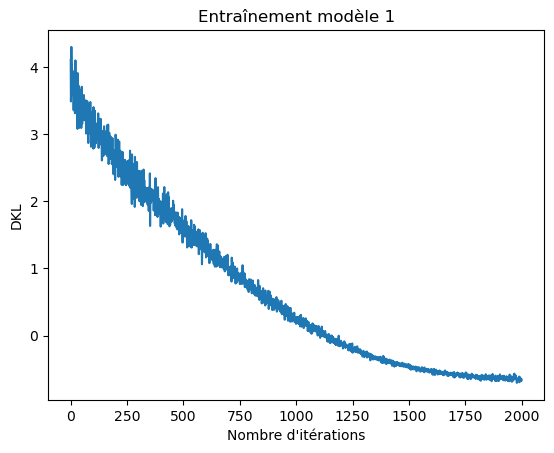

In [79]:
mymodel = VAN(input_size = taille)
loss=train(mymodel, log_prob_target_2, batch_size=1000,n_iter=2000, lr=1e-3)

plt.plot(loss)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle 1')
plt.show()

In [81]:
y1= torch.tensor([[1.0 for i in range(taille//2+5)] + [0.0 for i in range(taille//2-5)]])
y2= torch.tensor([[0.0 for i in range(taille//2-1)] + [1.0 for i in range(taille//2+1)]])

y3=torch.tensor([[0.0 for i in range(taille)]])
y4=torch.tensor([[1.0 for i in range(taille)]])

In [82]:
print(mymodel.prob_of_spins(y1))
print(mymodel.prob_of_spins(y2))
print(mymodel.prob_of_spins(y3))

print(mymodel.prob_of_spins(y4))


tensor([1.2951e-06], grad_fn=<ProdBackward1>)
tensor([4.2571e-07], grad_fn=<ProdBackward1>)
tensor([5.7415e-07], grad_fn=<ProdBackward1>)
tensor([1.6790e-06], grad_fn=<ProdBackward1>)


In [45]:
print(1/(2**(taille-1)))
print(1/(2**(taille+8)))

1.9073486328125e-06
3.725290298461914e-09
